In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('t_bbe.csv')
df.head()

,id,b,c,v,t
0,1001001,1,1,1,At the first God made the heaven and the earth.
1,1001002,1,1,2,And the earth was waste and without form; and ...
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God, looking on the light, saw that it was..."
4,1001005,1,1,5,"Naming the light, Day, and the dark, Night. An..."


In [3]:
df.shape

(31103, 5)

In [4]:
df.tail()

,id,b,c,v,t
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le..."
31099,66022018,66,22,18,For I say to every man to whose ears have come...
31100,66022019,66,22,19,And if any man takes away from the words of th...
31101,66022020,66,22,20,"He who gives witness to these things says, Tru..."
31102,66022021,66,22,21,The grace of the Lord Jesus be with the saints...


# Cleaning data

In [5]:
# Replacing with the correct name
df.b.replace({1:"Genesis",
2:"Exodus",
3:"Leviticus",
4:"Numbers",
5:"Deuteronomy",
6:"Joshua",
7:"Judges",
8:"Ruth",
9:"1 Samuel (1 Kings)",
10:"2 Samuel (2 Kings)",
11:"1 Kings (3 Kings)",
12:"2 Kings (4 Kings)",
13:"1 Chronicles",
14:"2 Chronicles",
15:"Ezra",
16:"Nehemiah",
17:"Esther",
18:"Job",
19:"Psalms",
20:"Proverbs",
21:"Ecclesiastes",
22:"Song of Solomon (Canticles)",
23:"Isaiah",
24:"Jeremiah",
25:"Lamentations",
26:"Ezekiel",
27:"Daniel",
28:"Hosea",
29:"Joel",
30:"Amos",
31:"Obadiah",
32:"Jonah",
33:"Micah",
34:"Nahum",
35:"Habakkuk",
36:"Zephaniah",
37:"Haggai",
38:"Zechariah",
39:"Malachi",
40:"Matthew",
41:"Mark",
42:"Luke",
43:"John",
44:"Acts",
45:"Romans",
46:"1 Corinthians",
47:"2 Corinthians",
48:"Galatians",
49:"Ephesians",
50:"Philippians",
51:"Colossians",
52:"1 Thessalonians",
53:"2 Thessalonians",
54:"1 Timothy",
55:"2 Timothy",
56:"Titus",
57:"Philemon",
58:"Hebrews",
59:"James",
60:"1 Peter",
61:"2 Peter",
62:"1 John",
63:"2 John",
64:"3 John",
65:"Jude",
66:"Revelation"},inplace=True)

In [6]:
df.head()

,id,b,c,v,t
0,1001001,Genesis,1,1,At the first God made the heaven and the earth.
1,1001002,Genesis,1,2,And the earth was waste and without form; and ...
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God, looking on the light, saw that it was..."
4,1001005,Genesis,1,5,"Naming the light, Day, and the dark, Night. An..."


In [7]:
# Renaming Columns
df.columns = ["id","book","chapter","verse","text"]

In [8]:
df.head()

,id,book,chapter,verse,text
0,1001001,Genesis,1,1,At the first God made the heaven and the earth.
1,1001002,Genesis,1,2,And the earth was waste and without form; and ...
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,1001004,Genesis,1,4,"And God, looking on the light, saw that it was..."
4,1001005,Genesis,1,5,"Naming the light, Day, and the dark, Night. An..."


# Quick Random Analysis

In [9]:
# Length of Each Sentence
df["verse_length"] = df.text.str.len()
df.head()

,id,book,chapter,verse,text,verse_length
0,1001001,Genesis,1,1,At the first God made the heaven and the earth.,47
1,1001002,Genesis,1,2,And the earth was waste and without form; and ...,142
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54
3,1001004,Genesis,1,4,"And God, looking on the light, saw that it was...",108
4,1001005,Genesis,1,5,"Naming the light, Day, and the dark, Night. An...",103


In [10]:
df['verse_length'].describe()

count    31103.000000
mean       133.311899
std         57.559609
min          2.000000
25%         90.000000
50%        124.000000
75%        168.000000
max        504.000000
Name: verse_length, dtype: float64

In [11]:
# Location of the longest verse
df[df['verse_length'] == 504]

,id,book,chapter,verse,text,verse_length
6035,6008033,Joshua,8,33,"And all Israel, those who were Israelites by b...",504


In [12]:
# Location of the shortest verse
df[df['verse_length'] == 2]

,id,book,chapter,verse,text,verse_length
18897,23064012,Isaiah,64,12,[],2
22036,27010021,Daniel,10,21,[],2
23721,40017021,Matthew,17,21,[],2
23738,40018011,Matthew,18,11,[],2
23932,40023014,Matthew,23,14,[],2
24479,41007016,Mark,7,16,[],2
24582,41009044,Mark,9,44,[],2
24584,41009046,Mark,9,46,[],2
24666,41011026,Mark,11,26,[],2
24854,41015028,Mark,15,28,[],2


# NLP Time

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [14]:
df.head()

,id,book,chapter,verse,text,verse_length
0,1001001,Genesis,1,1,At the first God made the heaven and the earth.,47
1,1001002,Genesis,1,2,And the earth was waste and without form; and ...,142
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54
3,1001004,Genesis,1,4,"And God, looking on the light, saw that it was...",108
4,1001005,Genesis,1,5,"Naming the light, Day, and the dark, Night. An...",103


In [15]:
df['compound'] = df['text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

In [16]:
df.head()

,id,book,chapter,verse,text,verse_length,compound
0,1001001,Genesis,1,1,At the first God made the heaven and the earth.,47,0.6597
1,1001002,Genesis,1,2,And the earth was waste and without form; and ...,142,0.0000
2,1001003,Genesis,1,3,"And God said, Let there be light: and there wa...",54,0.2732
3,1001004,Genesis,1,4,"And God, looking on the light, saw that it was...",108,0.7269
4,1001005,Genesis,1,5,"Naming the light, Day, and the dark, Night. An...",103,0.0000


# Analyzing & Visualizing compound scores

In [17]:
df_mean = df.groupby(by='book').mean()
df_mean.head()

,id,chapter,verse,verse_length,compound
book,,,,,
1 Chronicles,1.301329e+07,13.266454,20.186837,117.939490,0.092480
1 Corinthians,4.600937e+07,9.352403,16.711670,122.029748,0.147174
1 John,6.200315e+07,3.133333,11.923810,125.371429,0.270933
1 Kings (3 Kings),1.101127e+07,11.248775,20.851716,151.019608,0.002457
1 Peter,6.000274e+07,2.733333,11.409524,135.304762,0.291996


In [18]:
df_sorted = df_mean.sort_values(by=['compound'], ascending=False)

In [19]:
df_sorted['compound'].describe()

count    66.000000
mean      0.105330
std       0.172939
min      -0.192689
25%      -0.006545
50%       0.084175
75%       0.211036
max       0.644487
Name: compound, dtype: float64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

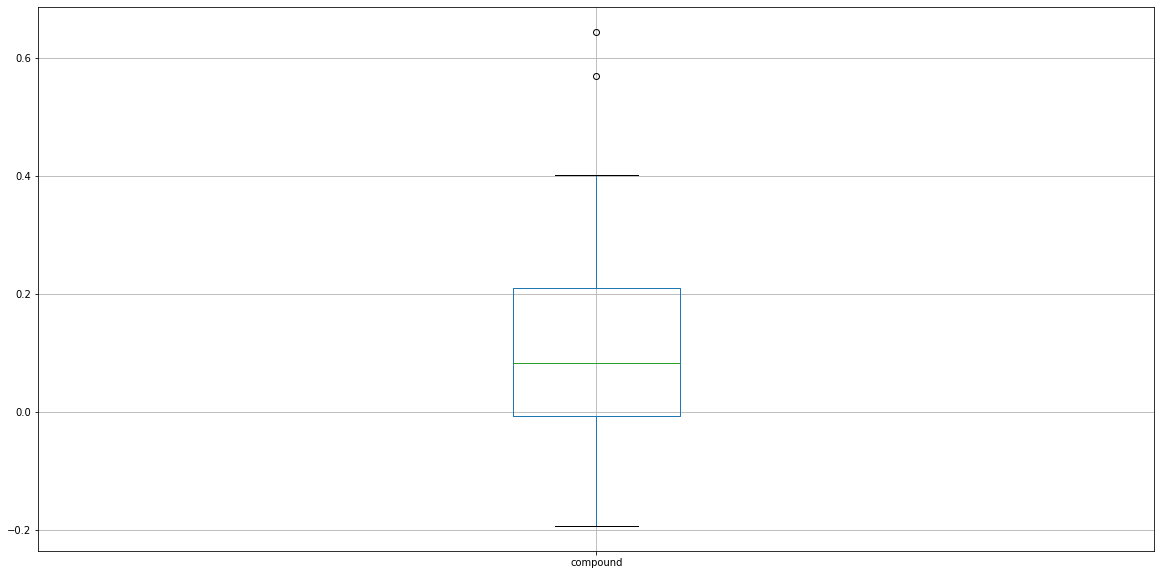

In [21]:
boxplot = df_sorted.boxplot(column=['compound'], figsize=(20,10))

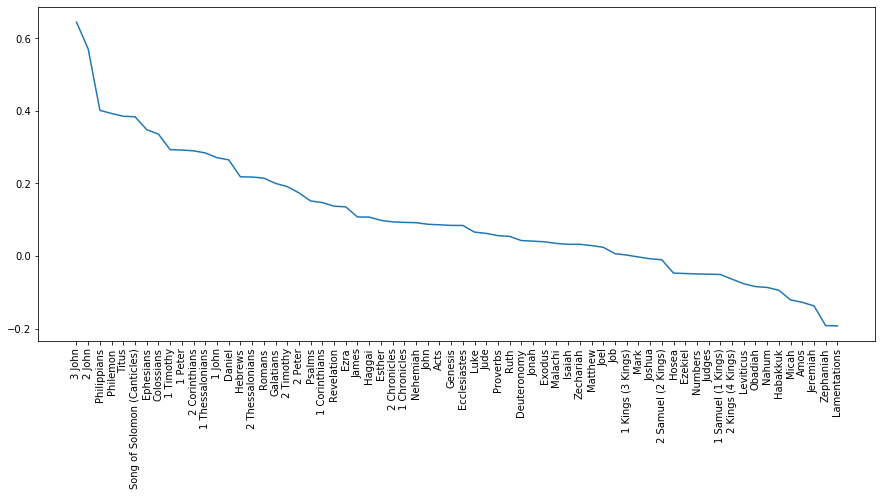

In [22]:
plt.figure(figsize=(15, 8))
plt.plot(df_sorted['compound'])
plt.xticks(rotation='vertical');
plt.gcf().subplots_adjust(bottom=0.3)
# plt.savefig('sent_analysis.png')

# Wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
comment_words = '' 
stopwords = set(STOPWORDS) 

In [25]:
for word in df.text:
    word = str(word)
    tokens = word.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += ' '.join(tokens)+' '
    
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     stopwords=stopwords,
                     min_font_size=10).generate(comment_words)

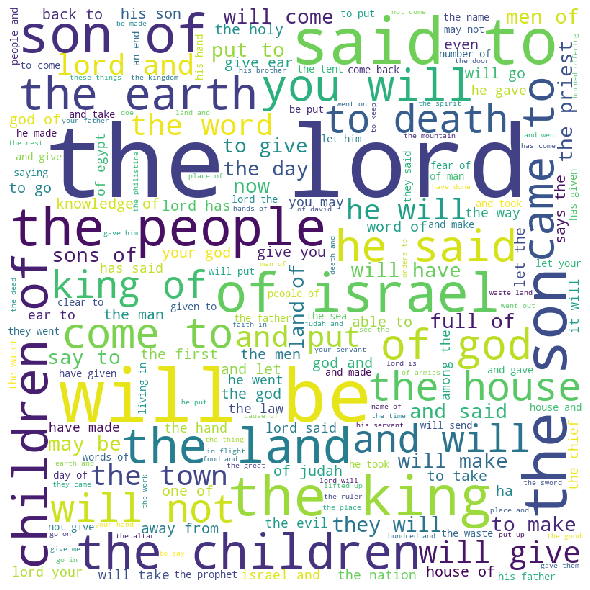

In [28]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.savefig('bible_wordcloud.png')

plt.show()